Run this first to create multiple new csvs out of your original.
- P0.csv needs to be in your data_sound folder in order to run

In [ ]:
import pandas as pd
import itertools as it
        
data_folder_jump = './data_sound'

tmp = pd.read_csv(data_folder_jump + "/P0_trialmat.csv")
new_tmp = tmp.copy()
new_tmp.drop("participant", axis=1)
new_tmp["participant"]= ''
mylist = list(it.repeat("P0",168))
new_tmp["participant"]= mylist
new_tmp.reset_index(drop=True,inplace=True)

i = 0
participant_ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
n_participants = len(participant_ids)
for i in range(0,19):
    tmp = pd.read_csv(data_folder_jump + "/P" +str(i)+ "_trialmat.csv")
    new_tmp = tmp.copy()
    new_tmp.drop("participant", axis=1)
    new_tmp["participant"]= ''
    mylist = list(it.repeat("P"+str(i+1),168))
    new_tmp["participant"]= mylist
    new_tmp.reset_index(drop=True,inplace=True)
    new_tmp.to_csv('./data_sound/P' + str(i+1) + '_trialmat.csv')



A. Basic setup and loading of data.

In [ ]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setup
data_folder_jump = './data_sound'

# create empty list
dfs_list = []
 
# load, append, and concatenate datasets into the list
participant_ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
n_participants = len(participant_ids)

for i in range(n_participants):
    temp_df = pd.read_csv(data_folder_jump + "/P" + str(participant_ids[i]) + "_trialmat.csv")

    #bring all created pt lists into the original list
    dfs_list.append(temp_df)

#bring all lists together under one pandas dataframe
data = pd.concat(dfs_list)

#In the dataframe, there are two directions for the stimuli to travel: from left to right (1) and right to left (2).
#In this next step, one of the directions is "reversed" to match the other.
new_data = data.copy()
new_data.loc[new_data.direction==2,'stop_pos']=new_data.loc[new_data.direction==2,'stop_pos']*-1

#sort data from left to right and right to left
lr = new_data[new_data.direction==1]
rl = new_data[new_data.direction==2]

lr.to_csv('./Sound_Figures/LR_all.csv')
rl.to_csv('./Sound_Figures/RL_all.csv')
new_data.to_csv('./BiDir_All.csv')

B. Plotting raw data.

In [ ]:
#stop position relative to center, error
#Both Directions
fig = plt.figure()
ax = fig.gca()
plt.plot(new_data['stop_pos'], new_data['error'], 'b.')
ax.set_xlabel('stop position')
ax.set_ylabel('error')
plt.title('All responses')
plt.savefig('./Sound_Figures/BiDir_Raw.jpeg')

#Right to Left
fig2 = plt.figure()
ax = fig2.gca()
plt.plot(lr['stop_pos'], lr['error'], 'g.')
ax.set_xlabel('stop position')
ax.set_ylabel('error')
plt.title('Left to Right')
plt.savefig('./Sound_Figures/LR_Raw.jpeg')

#Left to Right
fig3 = plt.figure()
ax2 = fig3.gca()
plt.plot(rl['stop_pos'], rl['error'], 'y.')
ax2.set_xlabel('stop position')
ax2.set_ylabel('error')
plt.title('Right to Left')
plt.savefig('./Sound_Figures/RL_Raw.jpeg')

C. Unique values of slope and y-intercept formulas to use for plotting later (I will use Seaborn to plot).
- Later found out that there are packages to do this. See:
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
    - https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [ ]:
# To determine the correct intercept of y, the mean of x cannot be 0 -- which is currently the situation.
# Thus a copy of the data is created whereby x is shifted from a range of -126:126 to a range of 0:252.
# This will be kept separate from the original data as to not interfer with other plotting later. 
newdata_4plot = new_data.copy()
newdata_4plot['stop_pos']=new_data['stop_pos']+126


#----------------------------------------------------------------------------------------------------------------------------------------------------------
# ALL, RIGHT TO LEFT
# determining slope and y intercept of all participants combined
x = newdata_4plot["stop_pos"] 
y = newdata_4plot["error"] 
n = np.size(x) 
  
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean

Sxy = np.sum(x*y)-n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean

# store calculations in variables. BiDir = bidirectional, lr = left to right, rl= right to left
b1_bidir_all_pts = Sxy/Sxx #slope
b0_bidir_all_pts = y_mean-b1_bidir_all_pts*x_mean #y-int

#----------------------------------------------------------------------------------------------------------------------------------------------------------
# ALL, LEFT TO RIGHT
# determining slope and y intercept of all participants combined, from trials that go from left to right.
#pick out only those trials that go from left to right
lr_4plot = newdata_4plot[newdata_4plot.direction==1]

x = lr_4plot["stop_pos"]
y = lr_4plot["error"]
n = np.size(x)
  
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)-n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
# store calculations in variables. BiDir = bidirectional, lr = left to right, rl= right to left
b1_lr = Sxy/Sxx #slope
b0_lr = y_mean-b1_lr*x_mean #y-int

#----------------------------------------------------------------------------------------------------------------------------------------------------------
# ALL, RIGHT TO LEFT
#right to left slope and y intercept
#pick out only those trials that go from right to left
rl_4plot = newdata_4plot[newdata_4plot.direction==2]

x = rl_4plot["stop_pos"]
y = rl_4plot["error"]
n = np.size(x)
  
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)-n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
# store calculations in variables. BiDir = bidirectional, lr = left to right, rl= right to left
b1_rl = Sxy/Sxx #slope
b0_rl = y_mean-b1_rl*x_mean #y-int

#----------------------------------------------------------------------------------------------------------------------------------------------------------
# Check the data
print('slope for all participants is', b1_bidir_all_pts)
print('slope for left to right is', b1_lr)
print('slope for right to left is', b1_rl)

print('intercept for all participants is', b0_bidir_all_pts)
print('intercept for left to right is', b0_lr)
print('intercept for right to left is', b0_rl)

D. Plotting linear regressions using Seaborn.
- Seaborn.regplot(): https://seaborn.pydata.org/generated/seaborn.regplot.html
    

In [ ]:
# ALL PARTICIPANTS, BOTH DIRECTIONS CONSIDERED

# create blank figure
fig = plt.figure()
ax = fig.gca()

#plot
sns.regplot(x=new_data["stop_pos"], y=new_data["error"], color = "b")

#Tweaks to make figure easier to read/prettier
unique = new_data["stop_pos"].unique()
plt.xticks(unique)
ax.grid(which='both')
ax.set_xlim(np.min(unique), np.max(unique)) 

# Plotting the slope and y-intercept that were calculated earlier (in part C)
plt.text(np.min(unique)+5,-95, s = "y-intercept = " + str(np.round(b0_bidir_all_pts,1)))
plt.text(np.min(unique)+5,-120, s = "slope = " + str(np.round(b1_bidir_all_pts,2)))
plt.title("All Participants - Linear regression for both directions")
plt.savefig('./Sound_Figures/BiDir_Linear_All.jpeg',dpi=200,bbox_inches='tight')

#----------------------------------------------------------------------------------------------------------------------------------------------------------
# ALL PTS, LEFT TO RIGHT

fig = plt.figure()
ax = fig.gca()

sns.regplot(x=lr["stop_pos"], y=lr["error"], color = "g")

unique_lr = lr["stop_pos"].unique()
plt.xticks(unique_lr)
ax.grid(which='both')
ax.set_xlim(np.min(unique_lr), np.max(unique_lr))

plt.text(np.min(unique)+5,-95, s = "y-intercept = " + str(np.round(b0_lr,1)))
plt.text(np.min(unique)+5,-120, s = "slope = " + str(np.round(b1_lr,2)))
plt.title("All Participants - Average left to right linear regression")
plt.savefig('./Sound_Figures/LR_Linear_All.jpeg',dpi=200,bbox_inches='tight')


#----------------------------------------------------------------------------------------------------------------------------------------------------------
# ALL PTS, RIGHT TO LEFT

fig = plt.figure()
ax = fig.gca()

sns.regplot(x=rl["stop_pos"], y=rl["error"], color = "y")

unique_rl = rl["stop_pos"].unique()
plt.xticks(unique_rl)
ax.grid(which='both')
ax.set_xlim(np.min(unique_rl), np.max(unique_rl))

plt.text(np.min(unique)+5,-95, s = "y-intercept = " + str(np.round(b0_rl,1)))
plt.text(np.min(unique)+5,-120, s = "slope = " + str(np.round(b1_rl,2)))
plt.title("All Participants - Average right to left linear regression")
plt.savefig('./Sound_Figures/RL_Linear_All.jpeg',dpi=200,bbox_inches='tight')

Run this, similar to what you did at the beginning. This will randomize a the y coordinate between participants in order to make the plotting more interesting later. If not running code, just ignore this :)

In [3]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools as it


# setup
data_folder_jump = './data_sound'

# create empty list
dfs_list = []
 
# load, append, and concatenate datasets into the list
participant_ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
n_participants = len(participant_ids)

for i in range(n_participants):
    temp_df = pd.read_csv(data_folder_jump + "/P" + str(participant_ids[i]) + "_trialmat.csv")

    #bring all created pt lists into the original list
    dfs_list.append(temp_df)

#bring all lists together under one pandas dataframe
data = pd.concat(dfs_list)

#In the dataframe, there are two directions for the stimuli to travel: from left to right (1) and right to left (2).
#In this next step, one of the directions is "reversed" to match the other.
new_data = data.copy()
new_data.loc[new_data.direction==2,'stop_pos']=new_data.loc[new_data.direction==2,'stop_pos']*-1

#sort data from left to right and right to left
lr = new_data[new_data.direction==1]
rl = new_data[new_data.direction==2]


        
data_folder_jump = './data_sound'

tmp = pd.read_csv(data_folder_jump + "/P0_trialmat.csv")
new_tmp = tmp.copy()
new_tmp.drop("participant", axis=1)
new_tmp["participant"]= ''
mylist = list(it.repeat("P0",168))
new_tmp["participant"]= mylist
new_tmp.reset_index(drop=True,inplace=True)

i = 0
participant_ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
n_participants = len(participant_ids)
for i in range(0,19):
    tmp = pd.read_csv(data_folder_jump + "/P" +str(i)+ "_trialmat.csv")
    new_tmp = tmp.copy()
    new_tmp.drop("participant", axis=1)
    new_tmp["participant"]= ''
    new_tmp['error']= new_tmp['error'].sample(frac=1).reset_index(drop=True) #randomize
    mylist = list(it.repeat("P"+str(i+1),168))
    new_tmp["participant"]= mylist
    new_tmp.reset_index(drop=True,inplace=True)
    new_tmp.to_csv('./data_sound/P' + str(i+1) + '_trialmat.csv')

E. Plotting linear regression for each unique participant.
- This will create 20 individual figures, similar to the ones done above (D).
    - I ended up using a subplots() method, but gridspec() can also be used: https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.gridspec.GridSpec.html
    - Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html

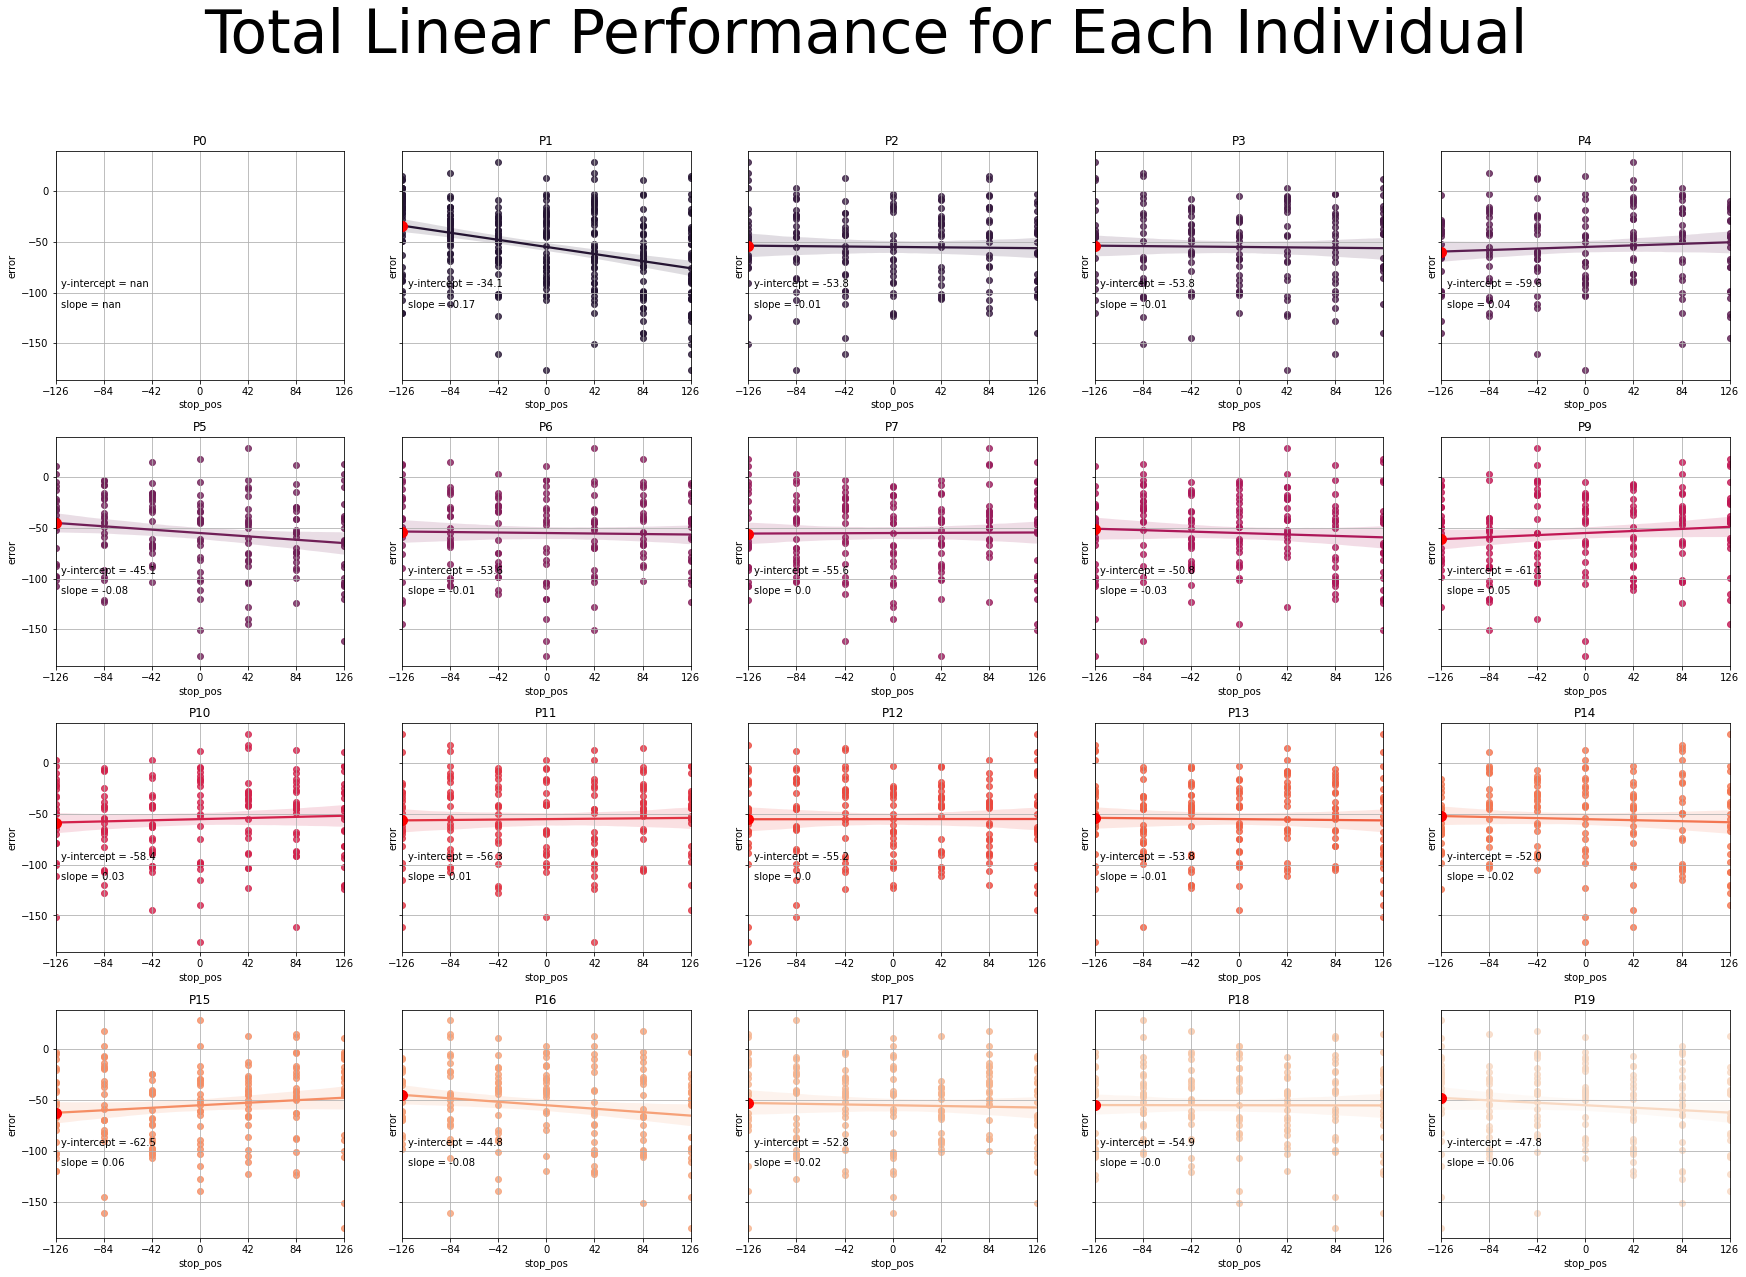

In [4]:
#choosing colors to be used in figures. This will read a new color with each new participant.
colors=sns.color_palette(palette="rocket", n_colors=len(participant_ids))

#create figure large enough to contain all 20 individual plots, i.e., 4X5 
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(30, 20), sharey=True)
fig.suptitle("Total Linear Performance for Each Individual", size = 60)

#turns axes from 2D to 1D
axs= axs.flatten()

#We have multiple names for each participant, and some data were not able to be used.
    #The individual csv files should read like this: "P1, P2, P3, P4, P5 ... "
    #But they instead read like this:                "P3, P4, P7, P9, P10 ... "

# to start the for loop, the unique participant IDs(p), "P3, P4, P7, P9, P10 ...", are stored in indices(i) in numerical order, "1,2,3,4,5 ...".
for i,p in enumerate(participant_ids):

    # 'ax' will stand for the current participant's data in the 4X5 figure.
    # as the for loop runs, this will plot from top to bottom, and then left to right.
    ax = axs[i]
    
    # extract data from the larger dataframe (A) and store this information for the current index
    participant_data = new_data.loc[new_data["participant"]=="P"+ str(p), :]

    #then come the y-int and slope calculations seen earlier (C)
    nd_4plt = participant_data.copy()
    nd_4plt['stop_pos']=participant_data['stop_pos']+126

    x = nd_4plt["stop_pos"]
    y = nd_4plt["error"]
    n = np.size(x)
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_mean,y_mean
    
    Sxy = np.sum(x*y)- n*x_mean*y_mean
    Sxx = np.sum(x*x)-n*x_mean*x_mean
    
    b1 = Sxy/Sxx
    b0 = y_mean-b1*x_mean

    #Then the same plotting as seen earlier (D)
    sns.regplot(x=participant_data["stop_pos"], y=participant_data["error"], color = colors[i], ax=ax)

    # "for each unique plot, name it with the current index's original participant number", i.e., "P3, P4, P7, P9, P10 ... "
    ax.set_title('P' + str(p))

    # Chart beautification
    unique = new_data["stop_pos"].unique()
    ax.set_xticks(unique)
    ax.grid(which='both')
    ax.set_xlim([np.min(unique), np.max(unique)])

    # in this same chart, plot the following using the information calculated for this unique [i]
    ax.plot(np.min(unique), b0, marker='.', ms = 20, color = 'r') #.plot(x location, y location, what type of marker, size of the plotted mark, color)
    ax.text(np.min(unique)+5,-95, s = "y-intercept = " + str(np.round(b0,1))) #.text(x location, y location, what you want written)
    ax.text(np.min(unique)+5,-115, s = "slope = " + str(np.round(b1,2)))

#after all charts are in their respective indexed locations, call this to adjust how close together they are.
plt.subplots_adjust(wspace=0.2, hspace=0.25)

plt.savefig('./Sound_Figures/BiDir_Ind_Lin.jpeg',dpi=200,bbox_inches='tight')